In [2]:
'''
https://gist.github.com/jetesdal/dd8df57b643eee0f7cde5badc5a6f002
'''
import xarray as xr # requires >= 0.15.1
import numpy as np
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt
%matplotlib inline

import os
os.getcwd()

%cd /g/data/p66/ars599/work_moc

/g/data/p66/ars599/work_moc


# CJ877

In [29]:
idir = './'
fname = idir+'cj877_2Dmoc.cdf' # 'cq880C_2Dmoc.cdf'

ds = xr.open_dataset(fname)
#ds1 = xr.open_mfdataset(f1name, combine='by_coords')

ds

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:         (YU_OCEAN: 1080, bnds: 2, ST_OCEAN1: 50, TIME1: 767)
Coordinates:
  * YU_OCEAN        (YU_OCEAN) float64 -81.02 -80.92 -80.81 ... 89.79 89.89 90.0
  * ST_OCEAN1       (ST_OCEAN1) float64 1.152 3.649 ... 5.034e+03 5.254e+03
  * TIME1           (TIME1) object 0001-01-16 12:00:00 ... 0064-11-15 21:36:00
Dimensions without coordinates: bnds
Data variables:
    YU_OCEAN_bnds   (YU_OCEAN, bnds) float64 ...
    ST_OCEAN1_bnds  (ST_OCEAN1, bnds) float64 ...
    TIME1_bnds      (TIME1, bnds) object ...
    MOC_GLB         (TIME1, ST_OCEAN1, YU_OCEAN) float64 ...
    MOC_ATL         (TIME1, ST_OCEAN1, YU_OCEAN) float64 ...
    MOC_INDPAC      (TIME1, ST_OCEAN1, YU_OCEAN) float64 ...
Attributes:
    history:      FERRET V7.6  13-Jun-23
    Conventions:  CF-1.6

In [30]:
gmoc = ds.MOC_GLB # * 1e-9
year_start = 1
year_end = 10
with ProgressBar():
    gmoc_mean = gmoc.sel(TIME1=(gmoc['TIME1.year'] >= year_start) & (gmoc['TIME1.year'] <= year_end)).mean('TIME1').load()

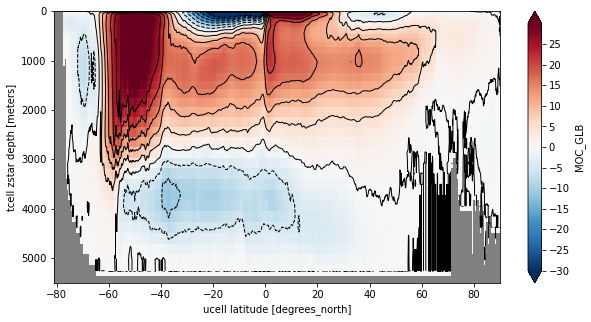

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
gmoc_mean.plot(ax=ax, yincrease=False,vmin=-30,vmax=30,cmap='RdBu_r',cbar_kwargs={'ticks': np.arange(-30,30,5)})
gmoc_mean.plot.contour(ax=ax, yincrease=False, levels=np.concatenate([np.arange(-30,0,5),np.arange(0,30,5)]),
                      colors='k', linewidths=1)
ax.set_facecolor('grey')
ax.set_ylim([5500,0])
#plt.savefig('/g/data/p66/ars599/work_moc/gmoc_cj877', dpi=120)
plt.show()

In [32]:
amoc = ds.MOC_ATL # * 1e-9

with ProgressBar():
    amoc_mean = amoc.sel(TIME1=(amoc['TIME1.year'] >= year_start) & (amoc['TIME1.year'] <= year_end)).mean('TIME1').load()

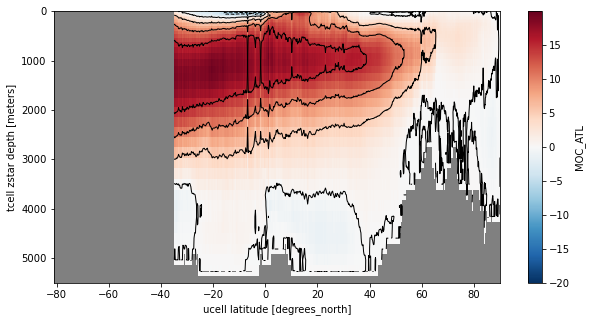

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
amoc_mean.plot(ax=ax, yincrease=False,vmin=-20,vmax=20,cmap='RdBu_r',cbar_kwargs={'ticks': np.arange(-20,20,5)})
amoc_mean.plot.contour(ax=ax, yincrease=False, levels=np.concatenate([np.arange(-20,0,5),np.arange(0,20,5)]),
                      colors='k', linewidths=1)
ax.set_facecolor('grey')
ax.set_ylim([5500,0])
#plt.savefig('/g/data/p66/ars599/work_moc/amoc_cj877', dpi=120)
plt.show()

In [34]:
pmoc = ds.MOC_INDPAC # * 1e-9

with ProgressBar():
    pmoc_mean = pmoc.sel(TIME1=(pmoc['TIME1.year'] >= year_start) & (pmoc['TIME1.year'] <= year_end)).mean('TIME1').load()

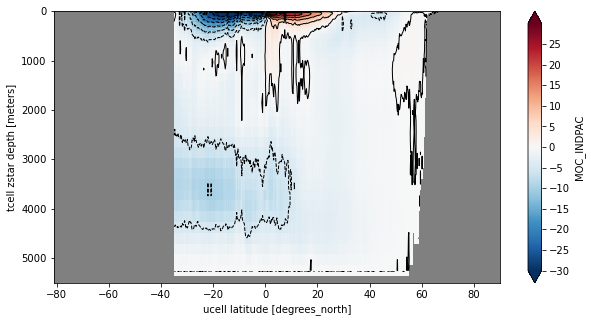

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
pmoc_mean.plot(ax=ax, yincrease=False,vmin=-30,vmax=30,cmap='RdBu_r',cbar_kwargs={'ticks': np.arange(-30,30,5)})
pmoc_mean.plot.contour(ax=ax, yincrease=False, levels=np.concatenate([np.arange(-30,0,5),np.arange(0,30,5)]),
                      colors='k', linewidths=1)
ax.set_facecolor('grey')
ax.set_ylim([5500,0])
#plt.savefig('/g/data/p66/ars599/work_moc/pmoc_cj877', dpi=120)
plt.show()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/nc_time_axis/__init__.py:249: CFWarning: this date/calendar/year zero convention is not supported by CF
  lower = cftime.num2date(vmin, self.date_unit, calendar=self.calendar)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/nc_time_axis/__init__.py:266: CFWarning: this date/calendar/year zero convention is not supported by CF
  cftime.datetime(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/nc_time_axis/__init__.py:344: CFWarning: this date/calendar/year zero convention is not supported by CF
  return cftime.date2num(ticks, self.date_unit, calendar=self.calendar)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/nc_time_axis/__init__.py:118: CFWarning: this date/calendar/year zero convention is not supported by CF
  dt = cftime.num2date(x, self.time_units, calendar=self.calendar)


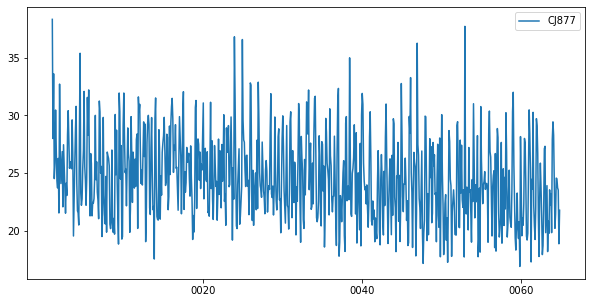

In [37]:
t1 = ds.TIME1
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(t1, amoc.max(dim=['YU_OCEAN', 'ST_OCEAN1']), label='CJ877') # YU_OCEAN: 1080bnds: 2ST_OCEAN1: 50TIME1: 506
#plt.savefig('/g/data/p66/ars599/work_moc/pmoc_cj877_ts', dpi=120)
plt.legend()
plt.show()


# CQ880C

In [39]:
idir = './'
fname = idir+'cq880C_2Dmoc.cdf'

ds = xr.open_dataset(fname)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [40]:
gmoc = ds.MOC_GLB # * 1e-9
year_start = 300
year_end = 310
with ProgressBar():
    gmoc_mean = gmoc.sel(TIME1=(gmoc['TIME1.year'] >= year_start) & (gmoc['TIME1.year'] <= year_end)).mean('TIME1').load()

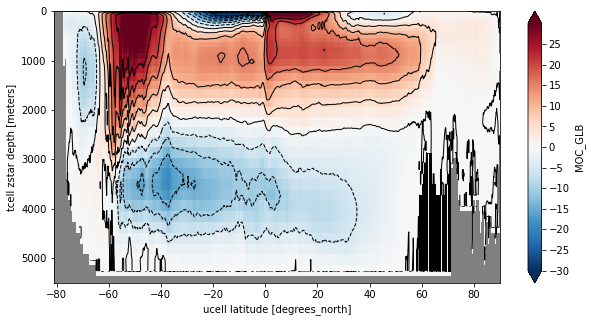

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
gmoc_mean.plot(ax=ax, yincrease=False,vmin=-30,vmax=30,cmap='RdBu_r',cbar_kwargs={'ticks': np.arange(-30,30,5)})
gmoc_mean.plot.contour(ax=ax, yincrease=False, levels=np.concatenate([np.arange(-30,0,5),np.arange(0,30,5)]),
                      colors='k', linewidths=1)
ax.set_facecolor('grey')
ax.set_ylim([5500,0])
#plt.savefig('/g/data/p66/ars599/work_moc/gmoc_cj877', dpi=120)
plt.show()

In [42]:
amoc = ds.MOC_ATL # * 1e-9

with ProgressBar():
    amoc_mean = amoc.sel(TIME1=(amoc['TIME1.year'] >= year_start) & (amoc['TIME1.year'] <= year_end)).mean('TIME1').load()

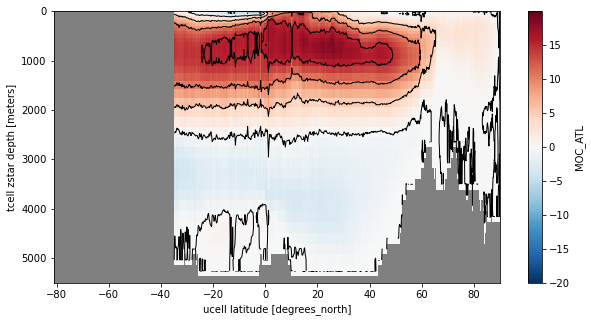

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
amoc_mean.plot(ax=ax, yincrease=False,vmin=-20,vmax=20,cmap='RdBu_r',cbar_kwargs={'ticks': np.arange(-20,20,5)})
amoc_mean.plot.contour(ax=ax, yincrease=False, levels=np.concatenate([np.arange(-20,0,5),np.arange(0,20,5)]),
                      colors='k', linewidths=1)
ax.set_facecolor('grey')
ax.set_ylim([5500,0])
#plt.savefig('/g/data/p66/ars599/work_moc/amoc_cj877', dpi=120)
plt.show()

In [44]:
pmoc = ds.MOC_INDPAC # * 1e-9

with ProgressBar():
    pmoc_mean = pmoc.sel(TIME1=(pmoc['TIME1.year'] >= year_start) & (pmoc['TIME1.year'] <= year_end)).mean('TIME1').load()

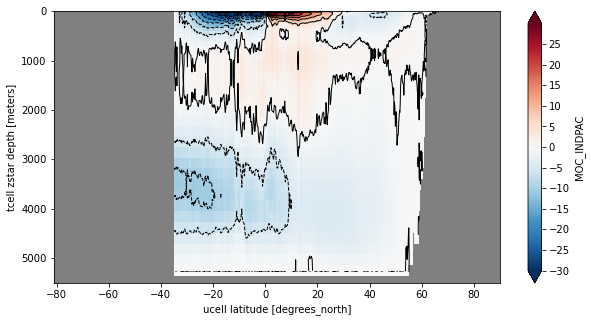

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
pmoc_mean.plot(ax=ax, yincrease=False,vmin=-30,vmax=30,cmap='RdBu_r',cbar_kwargs={'ticks': np.arange(-30,30,5)})
pmoc_mean.plot.contour(ax=ax, yincrease=False, levels=np.concatenate([np.arange(-30,0,5),np.arange(0,30,5)]),
                      colors='k', linewidths=1)
ax.set_facecolor('grey')
ax.set_ylim([5500,0])
#plt.savefig('/g/data/p66/ars599/work_moc/pmoc_cj877', dpi=120)
plt.show()

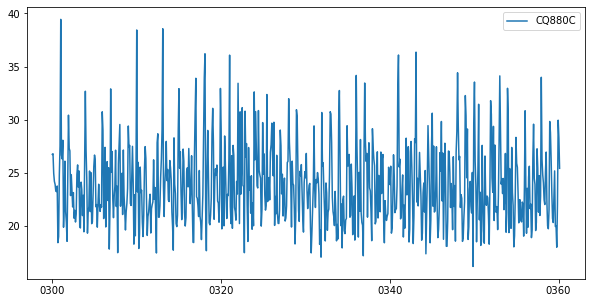

In [46]:
t1 = ds.TIME1
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(t1, amoc.max(dim=['YU_OCEAN', 'ST_OCEAN1']), label='CQ880C') # YU_OCEAN: 1080bnds: 2ST_OCEAN1: 50TIME1: 506
#plt.savefig('/g/data/p66/ars599/work_moc/pmoc_cj877_ts', dpi=120)
plt.legend()
plt.show()
